In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from models.cem_ibm_model import AEADEN 

import os
import time

In [2]:
dataset = MNIST(batch_size=64)
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN(device='cpu')

train_cnn(cnn, dataset, iterations=50, lr=0.01, device='cpu', save_fn='mnist-cnn-rescaled', load_path="models/saved_models/mnist-cnn.h5")

In [4]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


D:\Programmeren\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE()

train_ae(cae, dataset, iterations=2, save_fn="mnist-cae", load_path="./models/saved_models/mnist-cae-no-rs.h5")

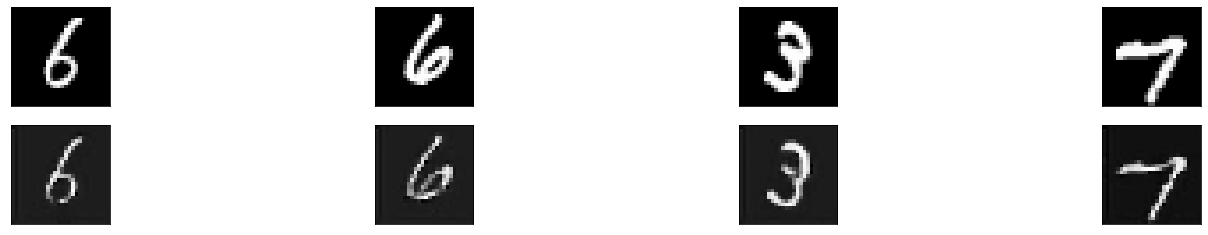

In [6]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [8]:
kappa = 10
gamma = 0
beta = 1.
lr = 0.1

CEM = AEADEN(model=cnn, AE=cae, max_iterations=1000, evaluate_every=50, n_searches=10, mode="PP", init_learning_rate=lr, c_init=0.1, kappa=kappa, gamma=gamma, beta=beta)

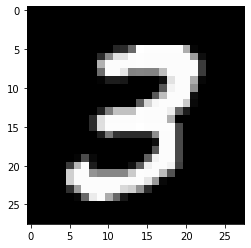

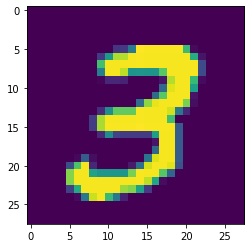

In [9]:
# obtain one sample
image = dataset.get_sample_by_class(class_label=3)

plt.imshow(image.squeeze())


In [10]:
# find pertinent negatives
cnn.float()
CEM.compute_CEM(image)

search:0 iteration:50 lr:0.10 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:100 lr:0.09 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:150 lr:0.09 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:200 lr:0.09 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:250 lr:0.09 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:300 lr:0.08 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:350 lr:0.08 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:400 lr:0.08 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:450 lr:0.07 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
search:0 iteration:500 lr:0.07 c value:0.10 loss: 1.02 delta sum:-251.35 optimum:True y grad:-0.001
s

search:4 iteration:100 lr:0.09 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:150 lr:0.09 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:200 lr:0.09 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:250 lr:0.09 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:300 lr:0.08 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:350 lr:0.08 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:400 lr:0.08 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:450 lr:0.07 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:500 lr:0.07 c value:100.00 loss: 1017.42 delta sum:-251.35 optimum:False y grad:-1.050
search:4 iteration:550 lr:0.07 c value:100.00 

search:7 iteration:900 lr:0.03 c value:5000.05 loss: 50871.54 delta sum:-251.35 optimum:False y grad:-52.521
search:7 iteration:950 lr:0.02 c value:5000.05 loss: 50871.54 delta sum:-251.35 optimum:False y grad:-52.521
search:7 iteration:1000 lr:0.00 c value:5000.05 loss: 50871.54 delta sum:-251.35 optimum:False y grad:-52.521
doei
search:8 iteration:50 lr:0.10 c value:50000.50 loss: 470104.28 delta sum:-283.61 optimum:True y grad:1129826.186
search:8 iteration:100 lr:0.09 c value:50000.50 loss: 0.00 delta sum:-297.57 optimum:True y grad:-159.334
search:8 iteration:150 lr:0.09 c value:50000.50 loss: 0.00 delta sum:-341.05 optimum:True y grad:-319.520
search:8 iteration:200 lr:0.09 c value:50000.50 loss: 614361.62 delta sum:-273.11 optimum:True y grad:-556791.236
search:8 iteration:250 lr:0.09 c value:50000.50 loss: 660066.62 delta sum:-274.02 optimum:True y grad:-1796536.395
search:8 iteration:300 lr:0.08 c value:50000.50 loss: 0.00 delta sum:-306.95 optimum:True y grad:-200.629
search:

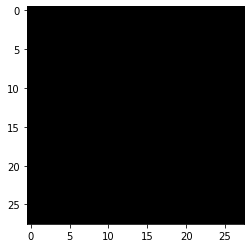

In [11]:
# perturbation
plt.imshow(image.squeeze()- CEM.best_delta.view(28,28), cmap="gray")

In [ ]:
# original image with perturbation
plt.imshow(CEM.delta_tracker[-1].view(28,28))

In [ ]:
plt.imshow(CEM.delta_tracker[-1].view(28,28)-image.view(28,28))

In [ ]:
# classification before
before = np.argmax(cnn(image.squeeze(-1)).detach()).item()
before

In [ ]:
cnn.double()
# classification after
after = np.argmax(cnn(CEM.delta_tracker[-1].view(1,28,28)).detach()).item()
after

In [ ]:
# classification after
cnn.double()
# classification of delta
class_delta = np.argmax(cnn(image.squeeze(-1) - CEM.best_delta.view(1,28,28)).detach()).item()
class_delta

In [ ]:
dirname = "saved_perturbations/kappa-{}-gamma-{}-beta-{}-lr-{}".format(kappa, gamma, beta, lr)
os.makedirs(dirname, exist_ok=True)
fname_orig = dirname + "/{}-cb-{}-ca-{}-orig.png".format(int(time.time()), before, after)
fname_pert = dirname + "/{}-before-{}-after-{}-pert.png".format(int(time.time()), before, after)
fname_combined = dirname + "/{}-before-{}-after-{}-pn.png".format(int(time.time()), before, after)
fname_combined_pp = dirname + "/{}-before-{}-after-{}-pp.png".format(int(time.time()), before, after)
plt.imsave(fname_orig, image.squeeze(), cmap="gray")
plt.imsave(fname_pert, CEM.best_delta.view(28,28) - image.squeeze(), cmap="gray")
plt.imsave(fname_combined, CEM.best_delta.view(28,28), cmap="gray")
plt.imsave(fname_combined_pp, image.squeeze() - CEM.best_delta.view(28,28))

In [ ]:
print(CEM.best_loss)

In [ ]:
print(CEM.best_pert_loss)

In [ ]:
print(CEM.best_c)